### Train all ML model using MOM6 data (double gyre)

In [2]:
import sys
sys.path.append('../../modules/')

%reload_ext autoreload
%autoreload 2
import datasets
import ML_classes

import matplotlib.pyplot as plt

In [3]:
MOM6_bucket = 'gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_'
file_names= ''
L = 'all'

In [4]:
ML_data = datasets.MOM6_all_transformer('-', 'all')

In [5]:
ML_data.read_datatree(MOM6_bucket, file_names, H_mask=500, large_filt=4)

Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_50km.zarr
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_100km.zarr
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_200km.zarr
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Double_Gyre/res5km/ml_data_400km.zarr
Subsampling


In [12]:
ML_data.generate_test_train_batches(exp_name='DG')

Computed and saved norm nc for all.
Test and train batches split. Number of batches: 37-5


In [16]:
# Setup ML model
ANN_model = ML_classes.ANN(shape=[36,36,2],num_in = len(ML_data.input_channels))
regress_sys = ML_classes.RegressionSystem(ANN_model)

regress_sys.train_system(ML_data, 401)

Train loss step 0:  0.7600438514271298 test loss: 0.6950246453285217
Train loss step 20:  0.36441420622774073 test loss: 0.3811836004257202
Train loss step 40:  0.3515279663575662 test loss: 0.37180700302124026
Train loss step 60:  0.3431677198087847 test loss: 0.36286441683769227
Train loss step 80:  0.33752001701174555 test loss: 0.3572040259838104
Train loss step 100:  0.33377195934991577 test loss: 0.35107660889625547
Train loss step 120:  0.32972788327449076 test loss: 0.345158189535141
Train loss step 140:  0.3220140184905078 test loss: 0.33704163432121276
Train loss step 160:  0.3112921537579717 test loss: 0.3239496052265167
Train loss step 180:  0.3064149722859666 test loss: 0.3191204845905304
Train loss step 200:  0.30262514465564005 test loss: 0.31524409651756286
Train loss step 220:  0.2998432621762559 test loss: 0.3132436275482178
Train loss step 240:  0.29766783440435257 test loss: 0.3112373471260071
Train loss step 260:  0.2961211252856899 test loss: 0.30761097073554994
T

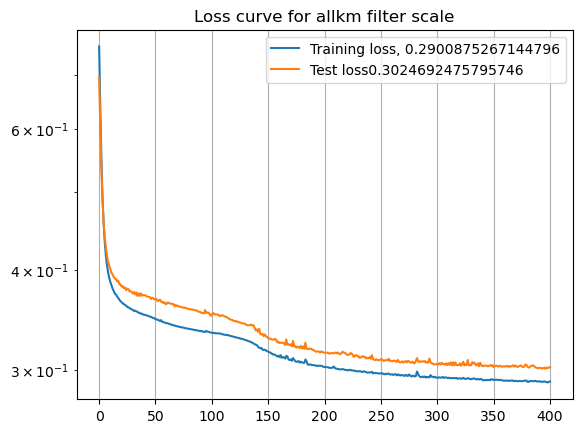

In [17]:
## Loss plot
plt.plot(regress_sys.train_loss, label='Training loss, '+str(regress_sys.train_loss[-1]))
plt.plot(regress_sys.test_loss, label='Test loss'+str(regress_sys.test_loss[-1]))

plt.title('Loss curve for '+ L+ 'km filter scale')
plt.grid()
plt.yscale('log')
plt.legend()

plt.savefig('figures/MOM6_DG_'+L+'km_loss_curve_36_36.png')

In [18]:
# Save the checkpoint
CKPT_DIR = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/ckpts_'+L+'_MOM6_DG_36_36'#+'_'+str(bias)
regress_sys.save_checkpoint(CKPT_DIR)

# Save model nc file
model_nc = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/' +'MOM6_DG_'+L+'_36_36.nc'
regress_sys.save_weights_nc(model_nc)